In [1]:
#Import Libraries
import pandas as pd
import string
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from matplotlib import rcParams
import pandas as pd
from collections import Counter
from itertools import chain
#from wordcloud import WordCloud, STOPWORDS
import re
import warnings
warnings.filterwarnings("ignore")
import collections
import os
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
rcParams['figure.figsize'] = 20,12
ps = PorterStemmer()
nltk.download('punkt')
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xaris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load the data
reviews = pd.read_csv(r"reviews_all_new.csv")
#drop unwanted column
reviews.drop(columns = ["Unnamed: 0"], inplace = True)
stop1 = ['food','good','nice','price','place','servic','restaur','visit','friendli','thessaloniki','order','great','dish','recommend','amaz','one','realli','us','serv','staff','qualiti','’','time', 'tri', 'experi', 'come', 'small', 'local', 'even', 'excel', 'reason', 'atmospher', 'best', 'love', 'enjoy', 'would', 'greek', 'well', 'also', 'fresh', 'back', 'like', 'tast', 'wine', 'definit', 'tabl', 'offer', 'menu', 'salad', 'drink', 'waiter', 'tradit', 'tasti', 'delici', 'day', 'peopl', 'go', 'meal', 'fish', 'dinner', 'eat', 'cook', 'portion', 'look', 'meat', 'citi', 'everyth', 'music', 'locat', 'lunch','town', 'warm', 'year', 'outsid', 'street', 'chicken', 'coffe', 'night', 'perfect', 'much', 'want', 'view', 'got', 'plate', 'littl', 'sea', 'expect', 'owner', 'ok', 'make', 'way', 'next', 'sit', 'wait', 'pizza', 'friend', 'cuisin', 'high', 'lot', 'differ', 'kind', 'noth', 'special', 'choic', 'decor', 'live', 'greec', 'alway', 'center', 'better', 'bread', 'ask', 'help', 'dont', 'get', 'mani', 'top', 'fantast', 'thing', 'say', 'two', 'first', 'didnt', 'busi', 'went', 'came', 'cours', 'though', 'polit', 'find', 'fast', 'end', 'grill', 'take', 'found', 'ever', 'quit', 'euro', 'wonder', 'everi', 'starter', 'bar', 'area', 'main', '2', 'full', 'hous', 'highli', 'could', 'burger', 'chees', 'made', 'big', 'valu', 'must', 'select', 'smoke', 'beauti', 'last', 'around', 'someth', 'varieti', 'money', 'feel', 'fri', 'beer', 'seafood', 'bit', 'insid', 'sure', 'worth', 'expens', 'disappoint', 'need', 'ate', 'famili', 'dessert','\"','”','“']

# Preprocessing 

In [3]:
# Remove punctuation
reviews['Review'] = reviews['Review'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
#Lower case everything
reviews['Review'] = reviews['Review'].str.lower()
reviews['Review_Distribution'] = reviews['Review_Distribution'].str.lower()
#Tokenize the reviews
reviews['Review'] = reviews.apply(lambda row: nltk.word_tokenize(row['Review']), axis=1)
#Remove stopwords
reviews['Review'] = reviews['Review'].apply(lambda x: [item for item in x if item not in stop])
#Stemming
reviews['Review'] = reviews['Review'].apply(lambda x: [ps.stem(y) for y in x])

#get the month
reviews['Rating_Month'] = reviews["Rating_date"].str.split(" ").str[0]
#get the year
reviews['Rating_Year'] = reviews["Rating_date"].str.split(",").str[1]
reviews['Rating_Year'] = reviews["Rating_Year"].str.replace(" ","")

#Create a new dataframe that contains the reviews and remove the extra stopwords
reviews_lda = reviews.copy()
reviews_lda['Review'] = reviews_lda['Review'].apply(lambda x: [item for item in x if item not in stop1])

# Basic Visualizations

## Number of Monthly Reviews

In [4]:
#Count the reviews of each month
months =  reviews['Rating_Month'].value_counts()
months_df = months.reset_index()
df_mapping = pd.DataFrame({
    'months': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
})

#Sort the results based on the specified order
sort_mapping = df_mapping.reset_index().set_index('months')
months_df['test'] = months_df['index'].map(sort_mapping['index'])
months_df = months_df.sort_values('test')
months_df.drop(columns = ['test'],inplace = True)
months_df.reset_index(drop =True,inplace = True)
months_df.set_index('index', inplace=True)

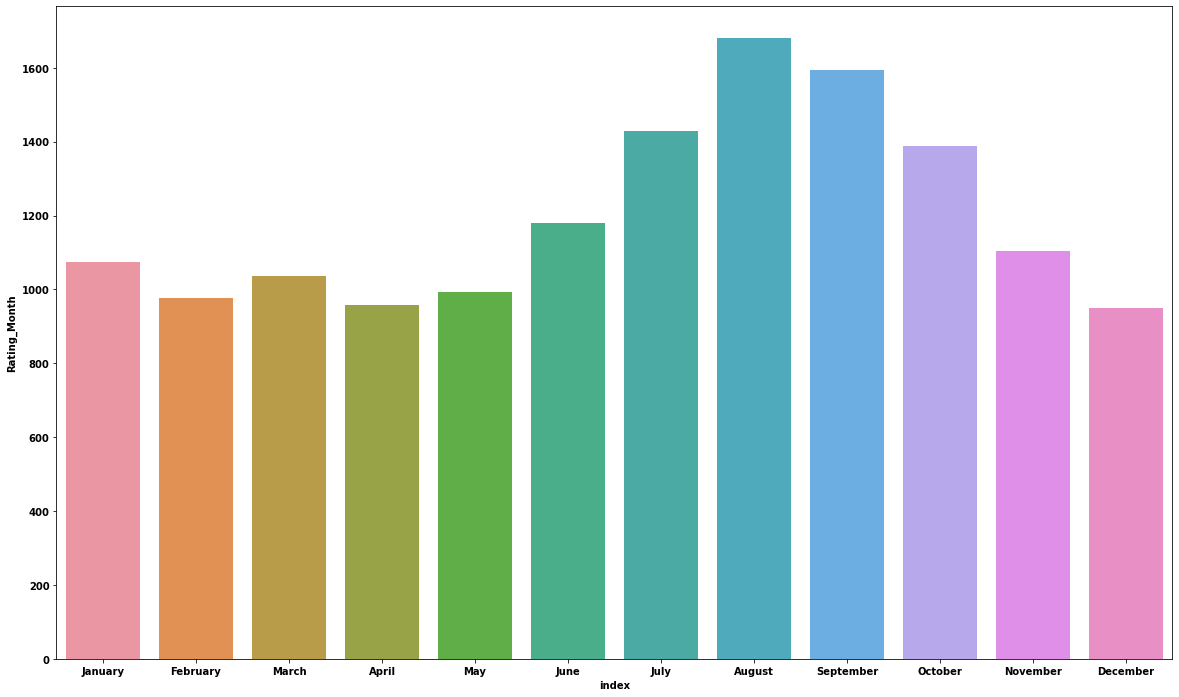

In [5]:
#Create a barplot
ax = sns.barplot(x = months_df.index, y = "Rating_Month", data = months_df)

## Most Common Words, Bi-grams, Tri-grams

In [6]:
from wordcloud import WordCloud

In [7]:
#Unify all the words used in reviews (unigrams) as well as two and three words that occur successively along with their
#frequencies in dictionaries
temp_uni = []
for i in range(len(reviews)):
    temp_uni += reviews['Review'][i]
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 1, 2, 3:
    all_counts[size] = FreqDist(ngrams(temp_uni, size))

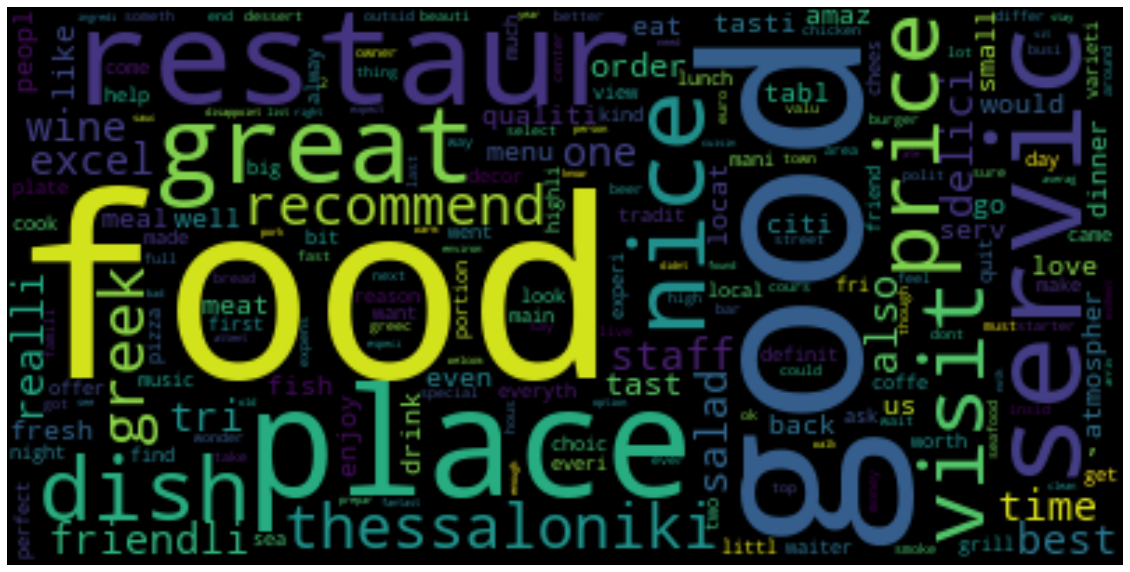

In [8]:
#create a dataframe which stores the words and their frequencies
unigrams = pd.DataFrame(all_counts[1].items(), columns = ['word', 'frequency'])
#sort words based on their frequencies
unigrams.sort_values(by = ['frequency'],ascending = False)
unigrams['word'] = unigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in unigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

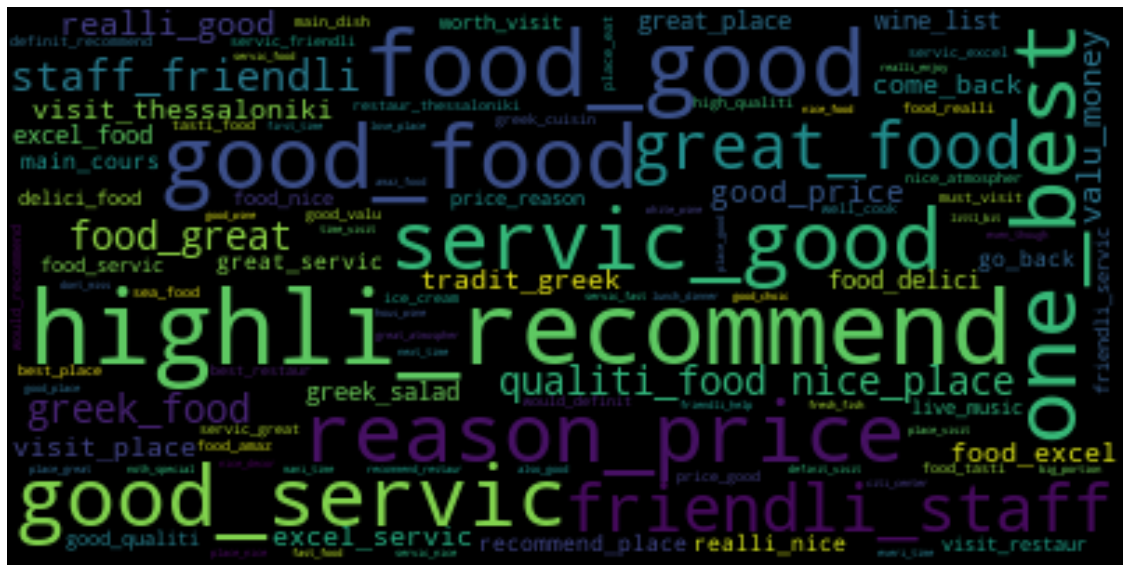

In [9]:
#create a dataframe which stores the bigrams and their frequencies
bigrams = pd.DataFrame(all_counts[2].items(), columns=['word', 'frequency'])
bigrams.sort_values(by = ['frequency'],ascending=False)
bigrams['word'] = bigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in bigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

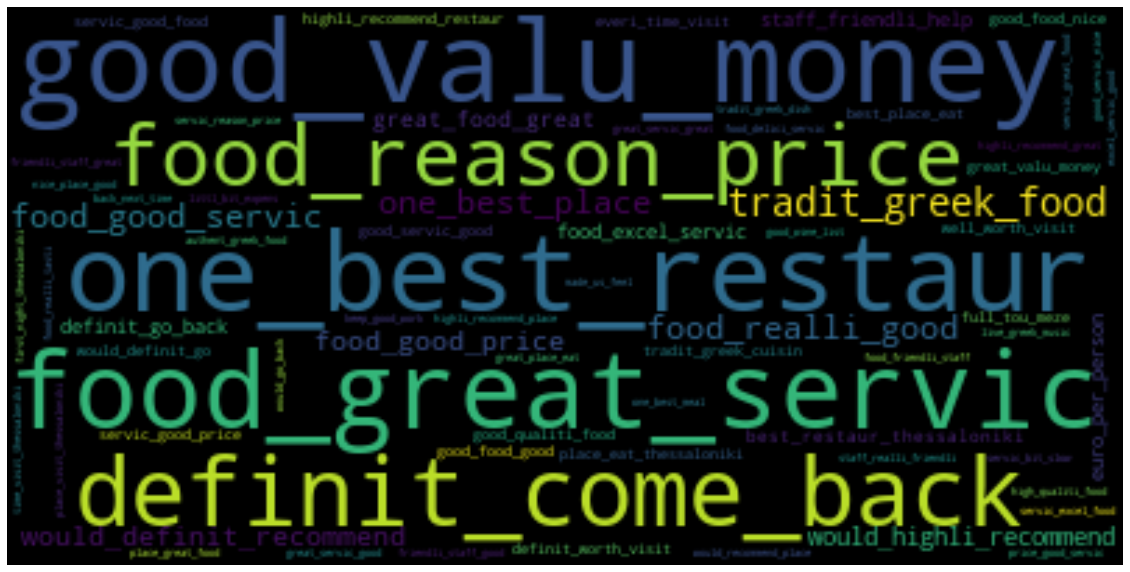

In [10]:
#create a dataframe which stores the trigrams and their frequencies
trigrams = pd.DataFrame(all_counts[3].items(), columns=['word', 'frequency'])
trigrams.sort_values(by = ['frequency'],ascending=False)
trigrams['word'] = trigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in trigrams.values]

wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
#Create a dataframe that contains reviews with score equals to 50
five_star_reviews = reviews.loc[reviews['Score'] == 50]

#Create a dataframe that contains reviews with score equals to 10
one_star_reviews = reviews.loc[reviews['Score'] == 10]

#Reset index
five_star_reviews.reset_index(drop = True, inplace = True)
one_star_reviews.reset_index(drop = True, inplace = True)

### One-star Reviews

In [12]:
#Store unigrams, bigrams, trigrams and their frequencies in a dictionary
temp_uni = []
for i in range(len(one_star_reviews)):
    temp_uni += one_star_reviews['Review'][i]
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 1, 2, 3:
    all_counts[size] = FreqDist(ngrams(temp_uni, size))

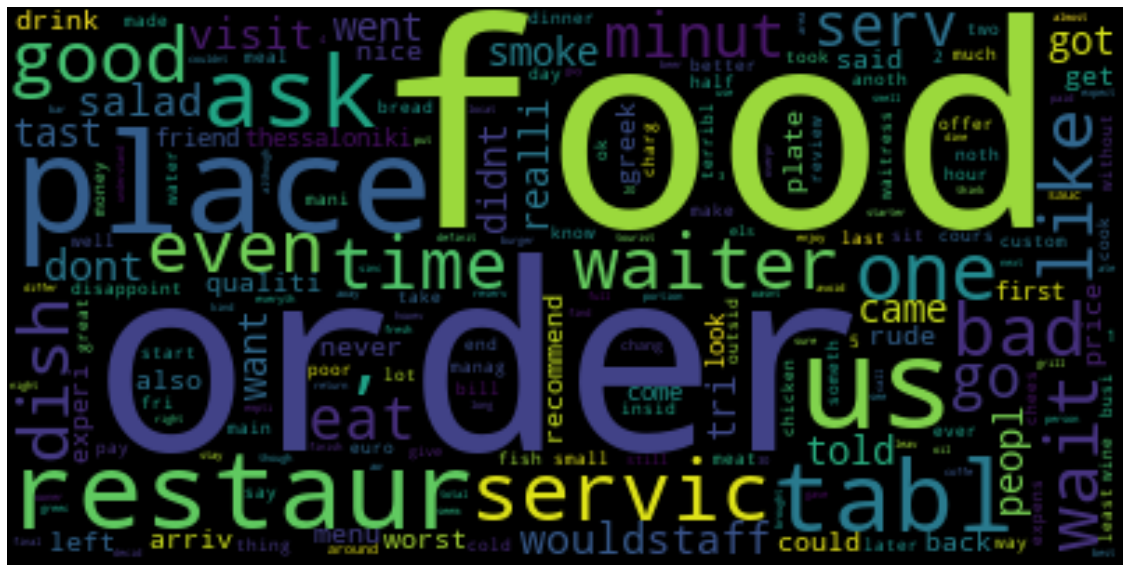

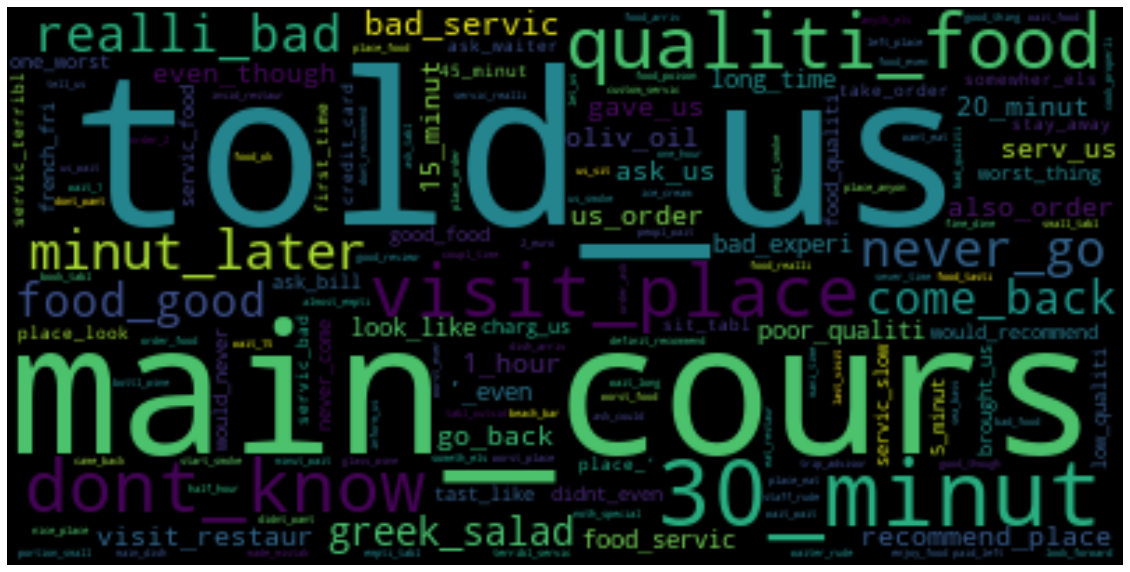

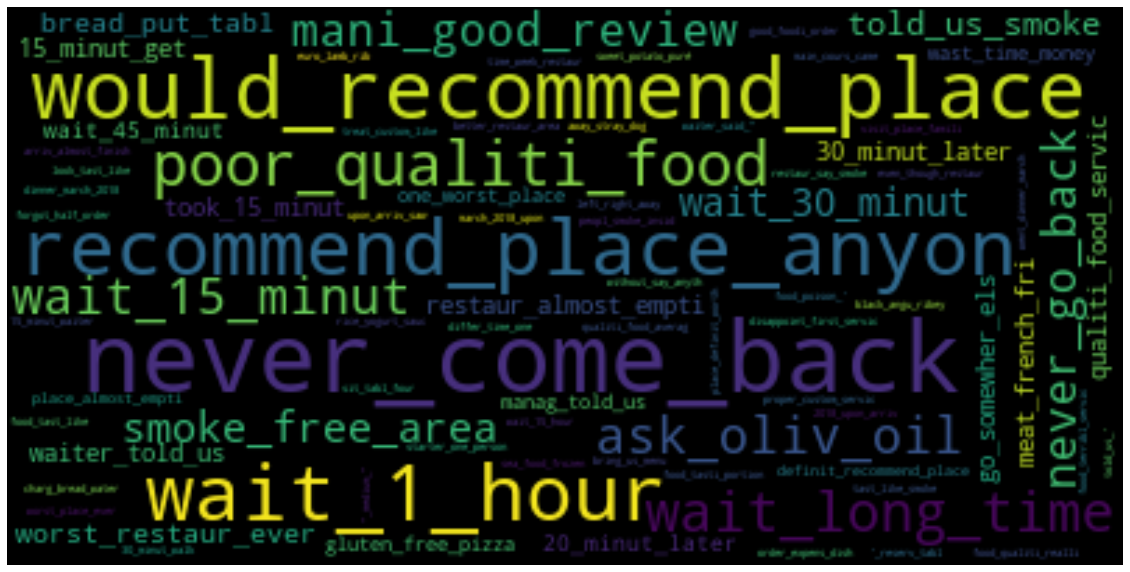

In [13]:
#create a dataframe which stores the unigrams and their frequencies
unigrams = pd.DataFrame(all_counts[1].items(), columns=['word', 'frequency'])
unigrams.sort_values(by = ['frequency'],ascending=False)
unigrams['word'] = unigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in unigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#create a dataframe which stores the bigrams and their frequencies
bigrams = pd.DataFrame(all_counts[2].items(), columns=['word', 'frequency'])
bigrams.sort_values(by = ['frequency'],ascending=False)
bigrams['word'] = bigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in bigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#create a dataframe which stores the trigrams and their frequencies
trigrams = pd.DataFrame(all_counts[3].items(), columns=['word', 'frequency'])
trigrams.sort_values(by = ['frequency'],ascending=False)
trigrams['word'] = trigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in trigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### five-star reviews

In [14]:
#Store unigrams, bigrams, trigrams and their frequencies in a dictionary
temp_uni = []
for i in range(len(five_star_reviews)):
    temp_uni += five_star_reviews['Review'][i]
from nltk import ngrams, FreqDist
all_counts = dict()
for size in 1, 2, 3:
    all_counts[size] = FreqDist(ngrams(temp_uni, size))

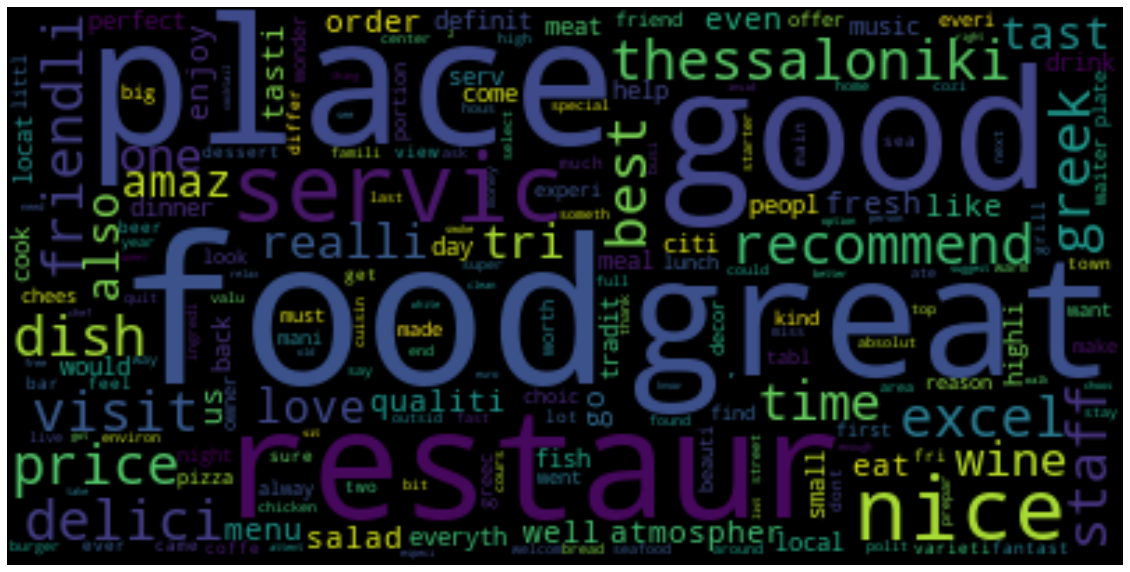

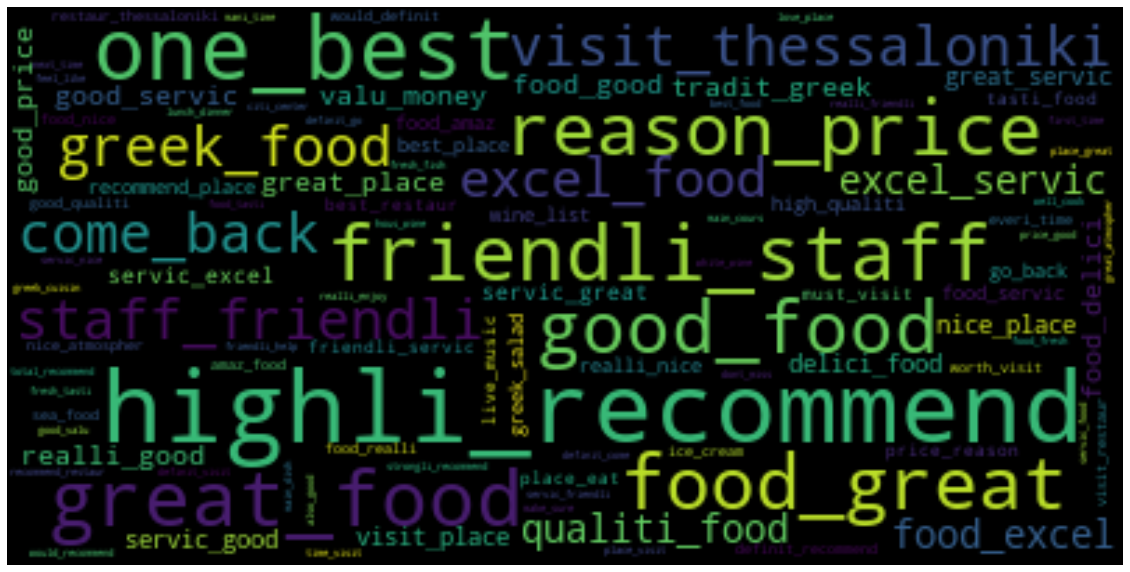

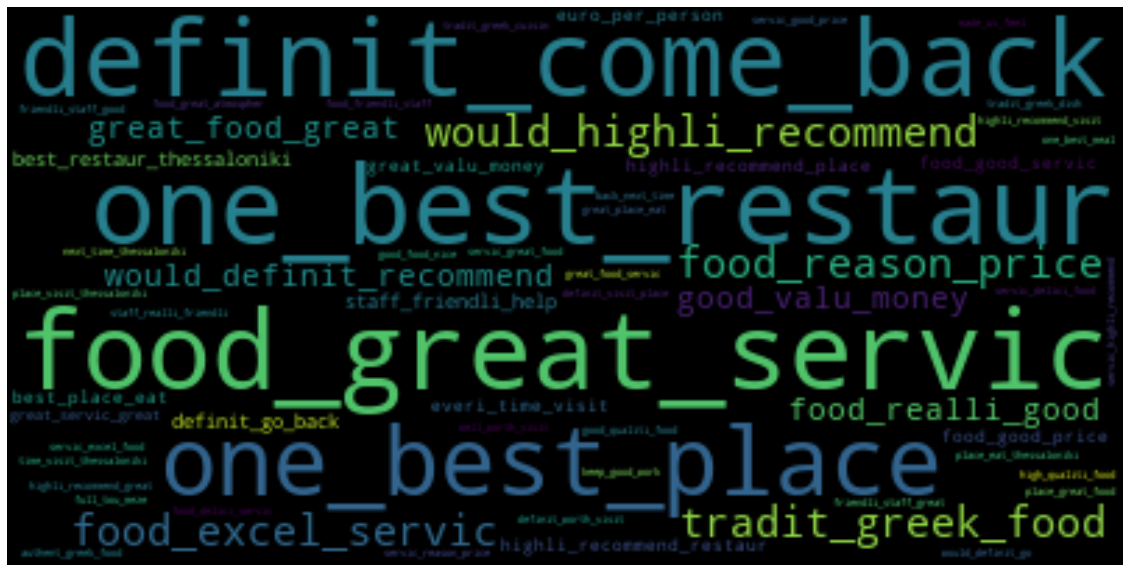

In [15]:
#create a dataframe which stores the unigrams and their frequencies
unigrams = pd.DataFrame(all_counts[1].items(), columns=['word', 'frequency'])
unigrams.sort_values(by = ['frequency'],ascending=False)
unigrams['word'] = unigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in unigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#create a dataframe which stores the bigrams and their frequencies
bigrams = pd.DataFrame(all_counts[2].items(), columns=['word', 'frequency'])
bigrams.sort_values(by = ['frequency'],ascending=False)
bigrams['word'] = bigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in bigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#create a dataframe which stores the trigrams and their frequencies
trigrams = pd.DataFrame(all_counts[3].items(), columns=['word', 'frequency'])
trigrams.sort_values(by = ['frequency'],ascending=False)
trigrams['word'] = trigrams['word'].apply(lambda x:'_'.join([i for i in x if i not in string.punctuation]))
tuples = [tuple(x) for x in trigrams.values]

#generate word cloud
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Topic Modeling

In [16]:
#Convert "Rating_date" into datetime and sort reviews based on that
reviews_lda['Rating_date'] = pd.to_datetime(reviews_lda['Rating_date'])
reviews_lda.sort_values(by = 'Rating_date', inplace = True)

#Keep only the columns that we need for LDA (Rating_date and Review)
sorted_reviews = reviews_lda.drop(reviews.columns.difference(['Rating_date', 'Review']), 1)
sorted_reviews.reset_index(drop = True, inplace = True)

#Convert each review into a list of the tokens it includes
temp_uni_sorted = []
for i in range(len(sorted_reviews)):
    temp_uni_sorted.append(sorted_reviews['Review'][i])

In [17]:
#Create chronologically ordered groups, where each one contains 2000 reviews
n = 2000
split_accross_years = [temp_uni_sorted[i:i + n] for i in range(0, len(temp_uni_sorted), n)]

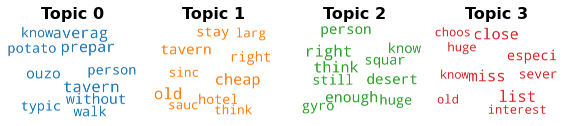

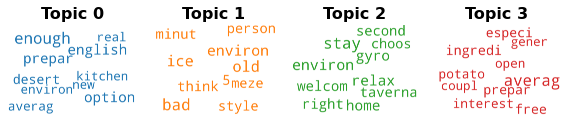

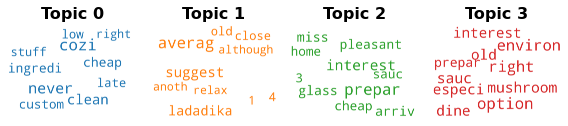

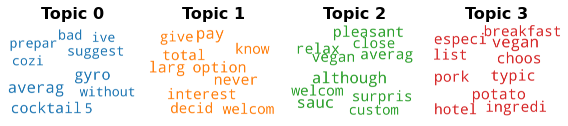

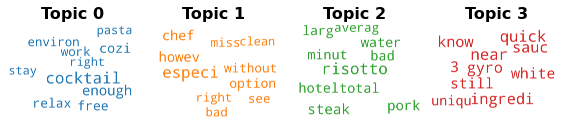

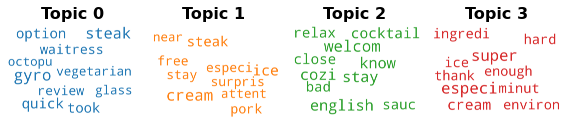

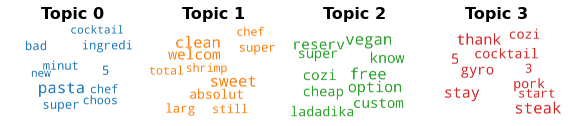

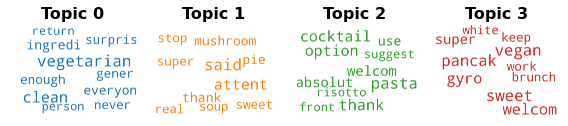

In [18]:
import gensim
from gensim.utils import simple_preprocess
import nltk
import gensim.corpora as corpora    
from pprint import pprint

# LDA for each group of reviews in chronological order
for i in split_accross_years:
    
    # Create Dictionary
    id2word = corpora.Dictionary(i)
    # Create Corpus
    texts = i
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]# View

    # Define the number of topics
    num_topics = 4    
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = num_topics)
    
    #Print the topics and the most important keywords
    #pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 
    
    cloud = WordCloud(background_color = 'white',
                      width = 2500,
                      height = 1800,
                      max_words = 15,
                      colormap = 'tab10',
                      color_func = lambda *args, **kwargs: cols[i],
                      prefer_horizontal = 1.0)
    
    topics = lda_model.show_topics(formatted = False)
    
    fig, axes = plt.subplots(1, 4, figsize = (8,8), sharex = True, sharey = True)
    
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()

## Fastest Growing and Fastest Shrinking Words

In [19]:
reviews['Rating_date'] =pd.to_datetime(reviews_lda['Rating_date'])
#we sort the dataframe by time so each chuck represents a time splot 
reviews.sort_values(by='Rating_date',inplace=True)
test = reviews.copy()
#n represents the size of each chunk we want to cut the dataframe
n = 1597
#x represents the array that consists of dictionaries on each cell and its size is the amount of chunks we have
x = []
#the loop stops when the dataframe is empty
while len(test)>0:
    #we just take the first n rows and then we proceed removing those rows after we have processed them
    temp = test.head(n)
    test = test.iloc[n: , :]
    temp_uni = []
    for i in range(len(temp)):
        temp_uni += temp['Review'].iloc[i]
    temp_uni = pd.Series(temp_uni)
#we create a dictionary for each chuck that has the shape of word:frequency
    x.append(temp_uni.value_counts().to_dict())

In [20]:
temp_uni = []
for i in range(len(reviews)):
    temp_uni += reviews['Review'].iloc[i]
uni_words = {}

#we find all the words and create a dictionary with them
for i in temp_uni:
    uni_words.update({i:0})

In [21]:
#word dictionary represents the for each worth the growth of it
word = {}
#dont_count dictionary exists so we can not count the words that dont exist in one or more time slots.
dont_count = {}
for i in range(len(x)-1):
    for z in uni_words.keys():
        try:
            next_time = x[i+1][z]
            try:
                current_time = x[i][z]
#here we calculate the growth of the specific time slot
                temp = (next_time-current_time)/current_time
            except:
                temp = 1
                dont_count.update({z:1})
        except:
            temp = -1
            #dont_count.update({x[i+1][z]:1})
            dont_count.update({z:1})
        try:
            word.update({z:temp+word[z]})
        except:
            word.update({z:temp})

In [22]:
#we transofrm the word dictionary in a dataframe and then we drop each word that exists in the dont_count dictionary
Growth = pd.DataFrame.from_dict([word]).T
for i in dont_count.keys():
    Growth.drop(str(i),inplace = True)

#here we get the top 10 and bottom 10 words that represent the positive and negative growth repsectively
Top = Growth.sort_values(by = 0,ascending =False).head(12)
Bottom = Growth.sort_values(by = 0,ascending =False).tail(10)
stop2 = ['‘','nowher']
Top.reset_index(inplace=True)
Top = Top[Top["index"].str.contains('‘')==False]
Top = Top[Top["index"].str.contains('nowher')==False]
Top.set_index('index', inplace=True)

In [23]:
Top

0
index               
vegan      15.462606
apolog     12.472222
decad      11.555556
appetis    11.352453
thin       11.242424
becam      10.955556
warmli     10.750000
request    10.473485
carpaccio  10.164502
crepe      10.057143

In [24]:
Bottom

0
specialti    -0.978968
aristotel    -1.032368
meze         -1.037670
room         -1.061111
famou        -1.067434
window       -1.084149
werent       -1.151007
soutzoukakia -1.278427
youll        -1.520704
histori      -1.865385

In [25]:
word = []
for i in range(len(x)):
        word.append(x[i]['aristotel'])

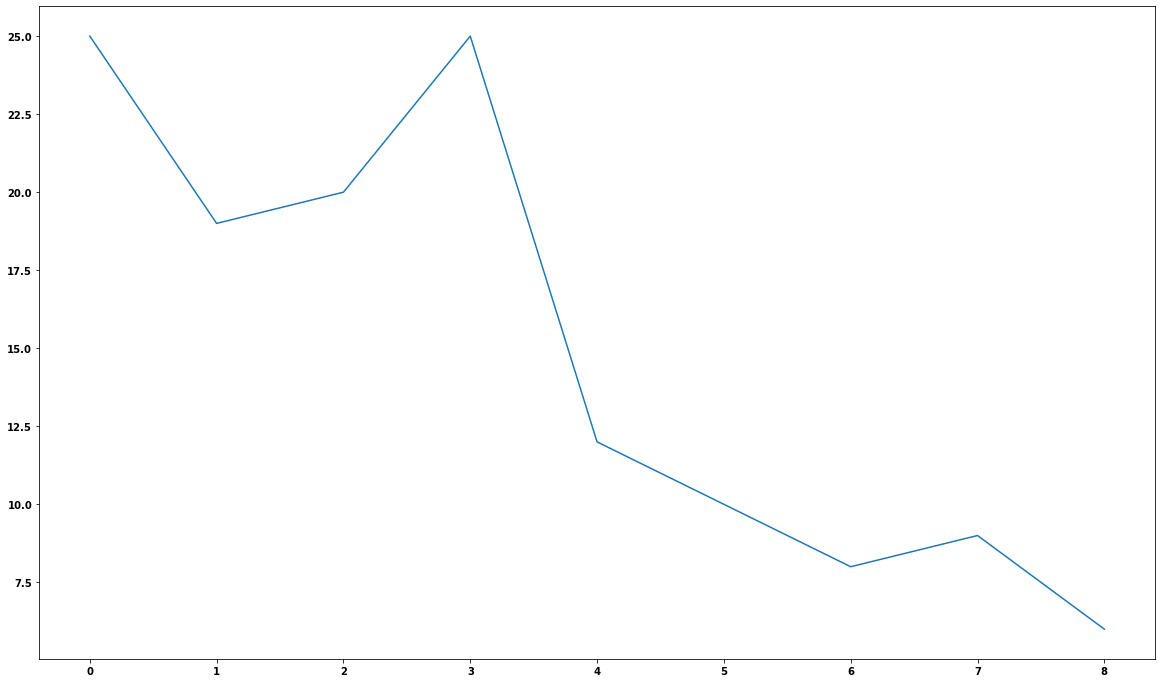

In [26]:
import matplotlib.pyplot as plt

plt.plot(word)
plt.show()

## Map of Locations

In [27]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim

In [28]:
#get county from city name
def get_country_from_city_name(x):
    try:
        geolocator = Nominatim(user_agent = "geoapiExercises")
        location = geolocator.geocode(x)
        address = location.raw
        return address.get('display_name').split(',')[-1]
    except:
        return 'Unknown Country'

In [29]:
#get country from the city name
def get_countries(x):
    try:
        array = x.split('from')[1]
    except:
        return 'no country given'
    try:
        return get_country_from_city_name(array.split(',')[1])
    except:
        try:
            return get_country_from_city_name(array)
        except:
            return 'Miss_spelled_City_Name'

In [30]:
#functions to get longitude and latitude data from country name
def geolocate_latitude(country):
        geolocator = Nominatim(user_agent = "geoapiExercises")
        loc = geolocator.geocode(country)
        return (loc.latitude)
    
def geolocate_longitude(country):
        geolocator = Nominatim(user_agent = "geoapiExercises")
        loc = geolocator.geocode(country)
        return (loc.longitude)

In [31]:
testdf = reviews.copy()

In [32]:
testdf['Country'] = testdf['Review_Distribution'].apply(lambda x: get_countries(x))
testdf['Country'] = testdf['Country'].str.strip()
testdf['Country'] = testdf['Country'].apply(lambda x: get_country_from_city_name(x))
# The above cell takes a while to run so we will present you how the dataframe will be transformed below.

In [33]:
reviews_map = pd.read_csv(r"beforegetcontinent.csv")
reviews_map.drop(columns = ["Unnamed: 0"], inplace = True)
reviews_map

Business_Name  Score           Username       Rating_date  \
0               ARGOFAGEIO     50          845irenav     April 6, 2022   
1               ARGOFAGEIO     50    yiannisleonidou     April 1, 2022   
2               ARGOFAGEIO     50           943katew    March 25, 2022   
3               ARGOFAGEIO     50            mittnic    March 10, 2022   
4               ARGOFAGEIO     50             dihuda  January 31, 2022   
...                    ...    ...                ...               ...   
11290                VOLOS     20   GastronomerThess    March 31, 2015   
11291                VOLOS     50             VlassV     March 8, 2012   
11292                VOLOS     50            kgoumas   August 14, 2011   
11293  MODIANO RETSINADIKO     10  _leonardo_basista    August 1, 2016   
11294  MODIANO RETSINADIKO     10             Loue L     April 8, 2016   

                      Date_of_Visit                                    Title  \
0         Date of visit: April 2022                Greek cuisine at its best   
1         Date of visit: April 2022                           Different food   
2         Date of visit: March 2022                                Fantastic   
3         Date of visit: March 2022                  Great food and ambience   
4       Date of visit: January 2022                  fabulous food and value   
...                             ...                                      ...   
11290     Date of visit: March 2015       Unprofessional staff-mediocre food   
11291  Date of visit: February 2012        Great choice for any occasion...!   
11292    Date of visit: August 2011        Very good, nice location & food !   
11293      Date of visit: July 2016  Liers,dirty,disgusting and expensive!!!   
11294     Date of visit: April 2016               Disgusting not edible food   

                                                  Review  \
0      ['everi', 'time', 'tri', 'describ', 'experi', ...   
1      ['food', 'amaz', 'friendli', 'staff', 'atmosph...   
2      ['amaz', 'great', 'time', 'restaur', 'love', '...   
3      ['nice', 'littl', 'restaur', 'good', 'simpl', ...   
4      ['fantast', 'fresh', 'food', 'great', 'servic'...   
...                                                  ...   
11290  ['great', 'place', 'eat', 'surround', 'build',...   
11291  ['except', 'servic', 'food', 'vast', 'varieti'...   
11292  ['nice', 'sea', 'food', 'restaur', 'central', ...   
11293  ['went', 'girlfriendso', 'old', 'man', 'told',...   
11294  ['order', 'miner', 'water', 'brought', 'us', '...   

                                     Age_Gender_Location  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3      REVIEW DISTRIBUTION\nExcellent\n3\nVery good\n...   
4      REVIEW DISTRIBUTION\nExcellent\n14\nVery good\...   
...                                                  ...   
11290  REVIEW DISTRIBUTION\nExcellent\n5\nVery good\n...   
11291                                                NaN   
11292  REVIEW DISTRIBUTION\nExcellent\n37\nVery good\...   
11293                                                NaN   
11294  REVIEW DISTRIBUTION\nExcellent\n0\nVery good\n...   

                                     Review_Distribution Rating_Month  \
0      tripadvisor member since 2015\nwoman from land...        April   
1      tripadvisor member since 2019\nfrom limassol c...        April   
2      tripadvisor member since 2018\nman from westwa...        March   
3              tripadvisor member since 2009\nfrom milan        March   
4      tripadvisor member since 2016\nfrom boston, ma...      January   
...                                                  ...          ...   
11290  tripadvisor member since 2014\n25-34 from athe...        March   
11291  tripadvisor member since 2012\nfrom thessaloni...        March   
11292  tripadvisor member since 2008\n35-49 man from ...       A

In [34]:
testdf = testdf[testdf['Country'] != 'Unknown Country']
testdf.reset_index(drop = True,inplace = True)

In [35]:
testdf['Latitude'] = testdf['Country'].apply(lambda x: geolocate_latitude(x))
testdf['Longitude'] = testdf['Country'].apply(lambda x: geolocate_longitude(x))
# The above cell takes a while to run so we will present you how the dataframe will be transformed below.

In [36]:
reviews_map = pd.read_csv(r"latlon.csv")
reviews_map.drop(columns = ["Unnamed: 0"], inplace = True)
reviews_map.drop(columns = ["Unnamed: 0.1"], inplace = True)
reviews_map

Business_Name  Score           Username       Rating_date  \
0               ARGOFAGEIO     50          845irenav     April 6, 2022   
1               ARGOFAGEIO     50    yiannisleonidou     April 1, 2022   
2               ARGOFAGEIO     50           943katew    March 25, 2022   
3               ARGOFAGEIO     50            mittnic    March 10, 2022   
4               ARGOFAGEIO     50             dihuda  January 31, 2022   
...                    ...    ...                ...               ...   
11290                VOLOS     20   GastronomerThess    March 31, 2015   
11291                VOLOS     50             VlassV     March 8, 2012   
11292                VOLOS     50            kgoumas   August 14, 2011   
11293  MODIANO RETSINADIKO     10  _leonardo_basista    August 1, 2016   
11294  MODIANO RETSINADIKO     10             Loue L     April 8, 2016   

                      Date_of_Visit                                    Title  \
0         Date of visit: April 2022                Greek cuisine at its best   
1         Date of visit: April 2022                           Different food   
2         Date of visit: March 2022                                Fantastic   
3         Date of visit: March 2022                  Great food and ambience   
4       Date of visit: January 2022                  fabulous food and value   
...                             ...                                      ...   
11290     Date of visit: March 2015       Unprofessional staff-mediocre food   
11291  Date of visit: February 2012        Great choice for any occasion...!   
11292    Date of visit: August 2011        Very good, nice location & food !   
11293      Date of visit: July 2016  Liers,dirty,disgusting and expensive!!!   
11294     Date of visit: April 2016               Disgusting not edible food   

                                                  Review  \
0      ['everi', 'time', 'tri', 'describ', 'experi', ...   
1      ['food', 'amaz', 'friendli', 'staff', 'atmosph...   
2      ['amaz', 'great', 'time', 'restaur', 'love', '...   
3      ['nice', 'littl', 'restaur', 'good', 'simpl', ...   
4      ['fantast', 'fresh', 'food', 'great', 'servic'...   
...                                                  ...   
11290  ['great', 'place', 'eat', 'surround', 'build',...   
11291  ['except', 'servic', 'food', 'vast', 'varieti'...   
11292  ['nice', 'sea', 'food', 'restaur', 'central', ...   
11293  ['went', 'girlfriendso', 'old', 'man', 'told',...   
11294  ['order', 'miner', 'water', 'brought', 'us', '...   

                                     Age_Gender_Location  \
0                                                    NaN   
1                                                    NaN   
2                                                    NaN   
3      REVIEW DISTRIBUTION\nExcellent\n3\nVery good\n...   
4      REVIEW DISTRIBUTION\nExcellent\n14\nVery good\...   
...                                                  ...   
11290  REVIEW DISTRIBUTION\nExcellent\n5\nVery good\n...   
11291                                                NaN   
11292  REVIEW DISTRIBUTION\nExcellent\n37\nVery good\...   
11293                                                NaN   
11294  REVIEW DISTRIBUTION\nExcellent\n0\nVery good\n...   

                                     Review_Distribution Rating_Month  \
0      tripadvisor member since 2015\nwoman from land...        April   
1      tripadvisor member since 2019\nfrom limassol c...        April   
2      tripadvisor member since 2018\nman from westwa...        March   
3              tripadvisor member since 2009\nfrom milan        March   
4      tripadvisor member since 2016\nfrom boston, ma...      January   
...                                                  ...          ...   
11290  tripadvisor member since 2014\n25-34 from athe...        March   
11291  tripadvisor member since 2012\nfrom thessaloni...        March   
11292  tripadvisor member since 2008\n35-49 man from ...       A

In [37]:
testdf = reviews_map.copy()